# Exploratory data Analysis

### Import Libraries and data 

In [54]:
# Import libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import datetime
from datetime import timedelta
import seaborn as sns

In [2]:
#os.getcwd()
os.chdir("/Users/anouaroussalah/Desktop/paris_traffic_prediction/Paris_traffic_prediction_BCG_Gamma/data")
os.getcwd()

'/Users/anouaroussalah/Desktop/paris_traffic_prediction/Paris_traffic_prediction_BCG_Gamma/data'

In [3]:
df = pd.read_csv("Dataset_last_year.csv", sep=";")

In [4]:
df.head()

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,4264,AV_Champs_Elysees,2022-06-17T16:00:00+02:00,1120.0,49.90000,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]..."
1,4264,AV_Champs_Elysees,2021-12-14T00:00:00+01:00,1024.0,13.06278,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]..."
2,4264,AV_Champs_Elysees,2021-12-13T23:00:00+01:00,1141.0,17.64834,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]..."
3,4264,AV_Champs_Elysees,2021-12-13T20:00:00+01:00,1132.0,30.02667,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]..."
4,4264,AV_Champs_Elysees,2021-12-13T19:00:00+01:00,1226.0,31.65889,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605,2.301722792456062","{""coordinates"": [[2.3009951475, 48.8717770435]..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Identifiant arc            8494 non-null   int64  
 1   Libelle                    8494 non-null   object 
 2   Date et heure de comptage  8494 non-null   object 
 3   Débit horaire              7489 non-null   float64
 4   Taux d'occupation          7468 non-null   float64
 5   Etat trafic                8494 non-null   object 
 6   Identifiant noeud amont    8494 non-null   int64  
 7   Libelle noeud amont        8494 non-null   object 
 8   Identifiant noeud aval     8494 non-null   int64  
 9   Libelle noeud aval         8494 non-null   object 
 10  Etat arc                   8494 non-null   object 
 11  Date debut dispo data      8494 non-null   object 
 12  Date fin dispo data        8494 non-null   object 
 13  geo_point_2d               8494 non-null   objec

In [87]:
relevant_features = ["Date et heure de comptage", "Libelle", "Débit horaire", "Taux d'occupation", "Etat trafic"]
df_ = df[relevant_features]

### Relevancy of "Etat arc" column 

In [89]:
df["Etat arc"].unique()

array(['Invalide', 'Barré'], dtype=object)

<AxesSubplot:xlabel='Débit horaire', ylabel='Etat arc'>

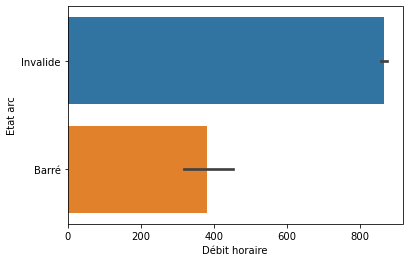

In [90]:
sns.barplot(data=df, x="Débit horaire", y="Etat arc")

<AxesSubplot:xlabel="Taux d'occupation", ylabel='Etat arc'>

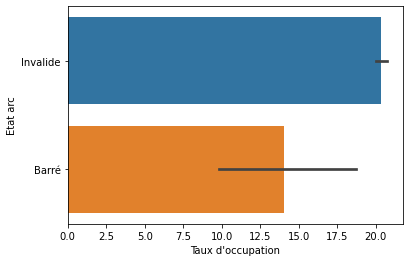

In [91]:
sns.barplot(data=df, x="Taux d'occupation", y="Etat arc")

## Processing of data

### Add relevant features 

In [97]:
df_["datetime"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=False)
df_["datetime_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True)
df_["date_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.date
df_["time_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.time
df_["weekday_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.day_name()
df_.drop(columns=["Date et heure de comptage"], inplace=True)

/Users/anouaroussalah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/anouaroussalah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/anouaroussalah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [99]:
df_.set_index('datetime', drop=True, append=False, inplace=True, verify_integrity=False)
df_ = df_.sort_index()

In [100]:
df_

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,datetime_utc,date_utc,time_utc,weekday_utc
datetime,,,,,,,,
2021-12-01 00:00:00+01:00,AV_Champs_Elysees,965.0,13.15167,Fluide,2021-11-30 23:00:00+00:00,2021-11-30,23:00:00,Tuesday
2021-12-01 01:00:00+01:00,AV_Champs_Elysees,1156.0,22.92111,Pré-saturé,2021-12-01 00:00:00+00:00,2021-12-01,00:00:00,Wednesday
2021-12-01 02:00:00+01:00,AV_Champs_Elysees,825.0,22.89000,Pré-saturé,2021-12-01 01:00:00+00:00,2021-12-01,01:00:00,Wednesday
2021-12-01 03:00:00+01:00,AV_Champs_Elysees,760.0,19.83556,Pré-saturé,2021-12-01 02:00:00+00:00,2021-12-01,02:00:00,Wednesday
2021-12-01 04:00:00+01:00,AV_Champs_Elysees,589.0,17.67389,Pré-saturé,2021-12-01 03:00:00+00:00,2021-12-01,03:00:00,Wednesday
...,...,...,...,...,...,...,...,...
2022-12-04 20:00:00+01:00,AV_Champs_Elysees,718.0,63.24500,Bloqué,2022-12-04 19:00:00+00:00,2022-12-04,19:00:00,Sunday
2022-12-04 21:00:00+01:00,AV_Champs_Elysees,964.0,46.79945,Saturé,2022-12-04 20:00:00+00:00,2022-12-04,20:00:00,Sunday
2022-12-04 22:00:00+01:00,AV_Champs_Elysees,837.0,32.26778,Saturé,2022-12-04 21:00:00+00:00,2022-12-04,21:00:00,Sunday


In [101]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 2021-12-01 00:00:00+01:00 to 2022-12-05 00:00:00+01:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Libelle            8494 non-null   object             
 1   Débit horaire      7489 non-null   float64            
 2   Taux d'occupation  7468 non-null   float64            
 3   Etat trafic        8494 non-null   object             
 4   datetime_utc       8494 non-null   datetime64[ns, UTC]
 5   date_utc           8494 non-null   object             
 6   time_utc           8494 non-null   object             
 7   weekday_utc        8494 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 597.2+ KB


## Visualizing data 

Text(0.5, 1.0, 'Débit horaire depuis le 25 novembre')

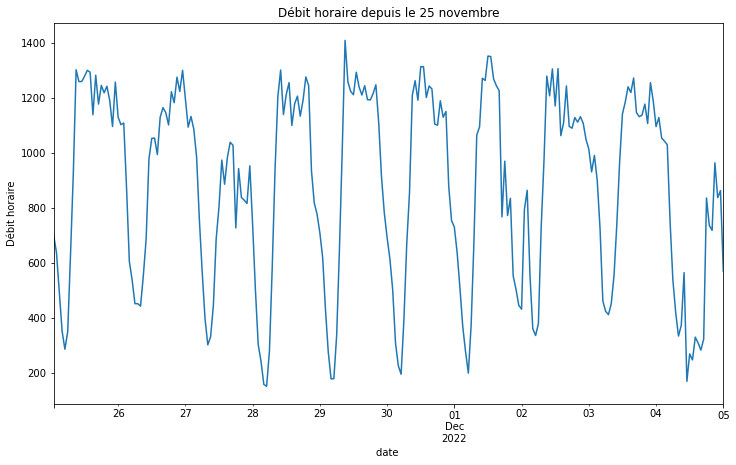

In [103]:
plt.figure(figsize=(12,7))
df_[df_.date_utc>=datetime.date(2022,11,25)]["Débit horaire"].plot()
plt.ylabel("Débit horaire")
plt.xlabel("date ")
plt.title("Débit horaire depuis le 25 novembre")

Text(0.5, 1.0, "Taux d'occupation depuis le 25 novembre")

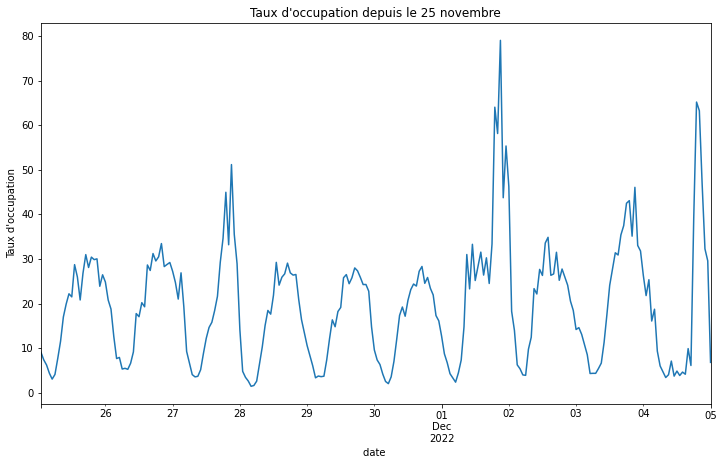

In [104]:
plt.figure(figsize=(12,7))
df_[df_.date_utc>=datetime.date(2022,11,25)]["Taux d'occupation"].plot()
plt.ylabel("Taux d'occupation")
plt.xlabel("date ")
plt.title("Taux d'occupation depuis le 25 novembre")

<AxesSubplot:xlabel='Débit horaire'>

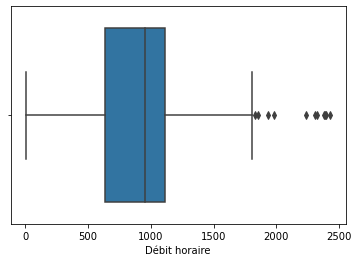

In [105]:
sns.boxplot(data=df_, x="Débit horaire")

<AxesSubplot:xlabel="Taux d'occupation">

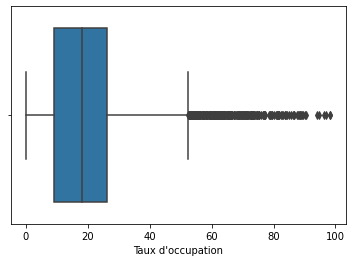

In [106]:
sns.boxplot(data=df_, x="Taux d'occupation")

There are some outliers in the distribution of these variables. So the median should be more robust than the mean.

## Missing values 

Text(0.5, 0, 'date ')

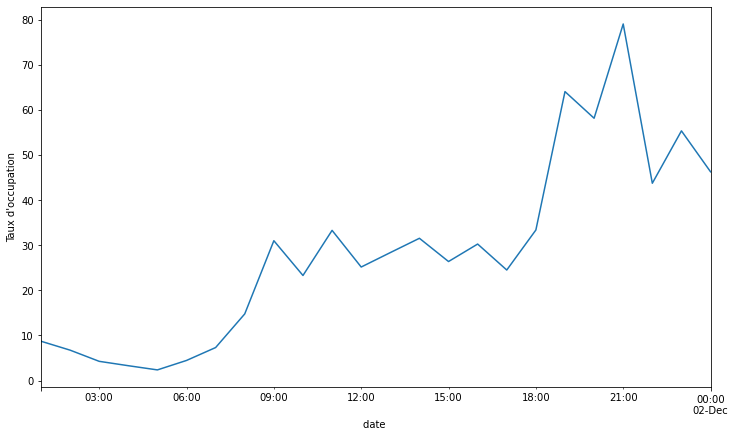

In [107]:
plt.figure(figsize=(12,7))
df_[df_.date_utc==datetime.date(2022,12,1)]["Taux d'occupation"].plot()
plt.ylabel("Taux d'occupation")
plt.xlabel("date ")

Text(0.5, 0, 'date ')

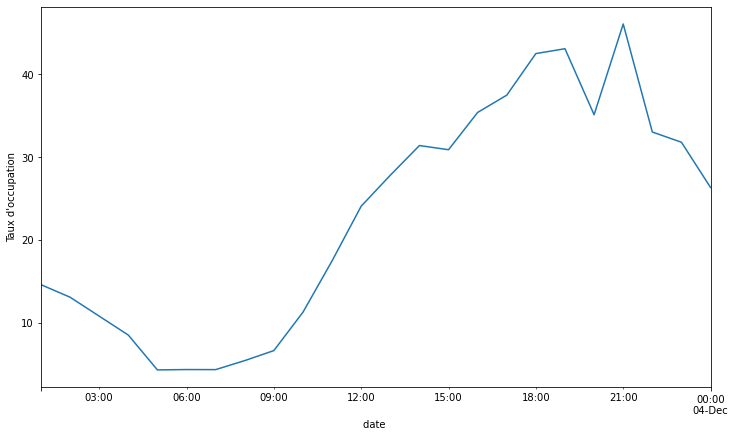

In [108]:
plt.figure(figsize=(12,7))
df_[df_.date_utc==datetime.date(2022,12,3)]["Taux d'occupation"].plot()
plt.ylabel("Taux d'occupation")
plt.xlabel("date ")

## Filling missing values 

<AxesSubplot:xlabel='datetime'>

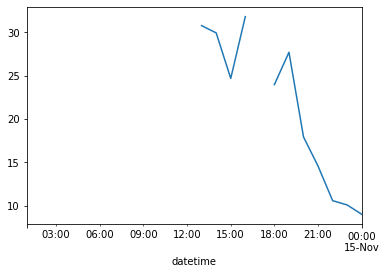

In [109]:
df_[df_.date_utc==datetime.date(2022,11,14)]["Taux d'occupation"].plot()

In [40]:
print("number of days with NaN values : " ,len(df_[df_['Débit horaire'].isna()].day_utc.unique()))

number of days with NaN values :  69


/Users/anouaroussalah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


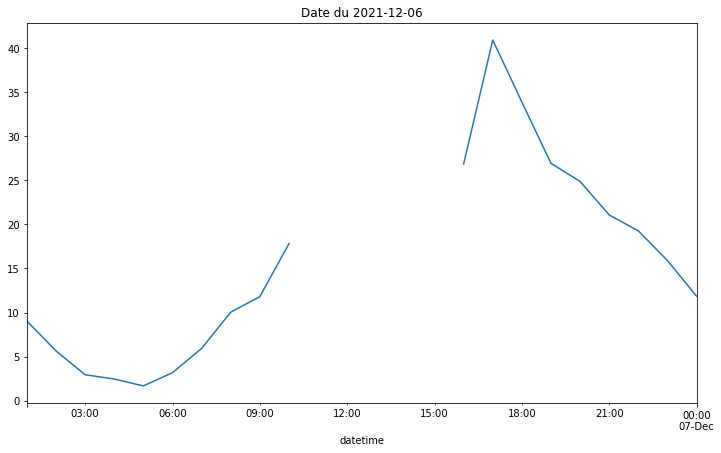

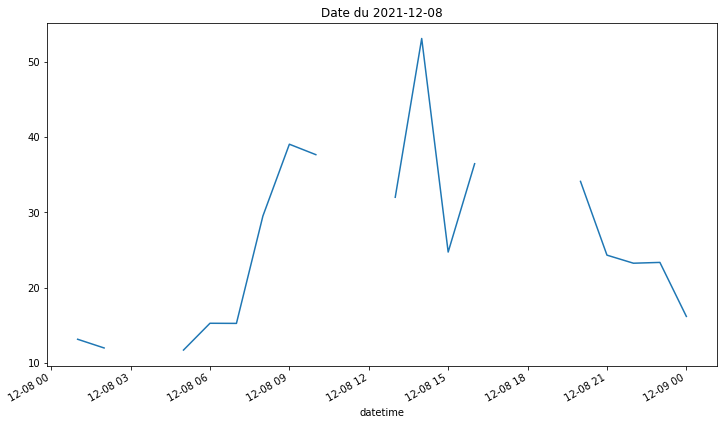

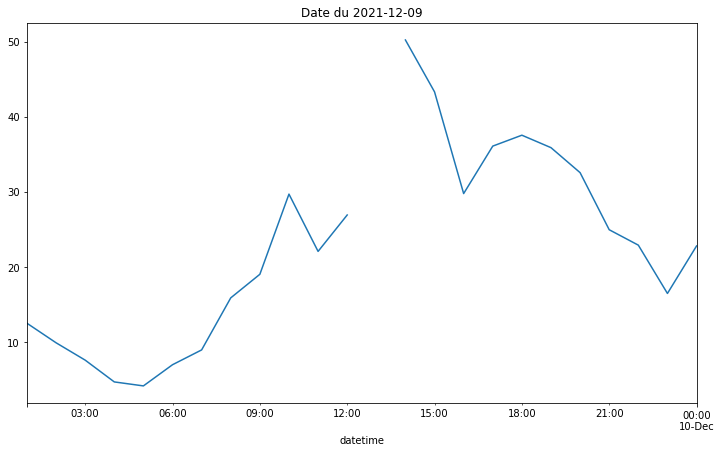

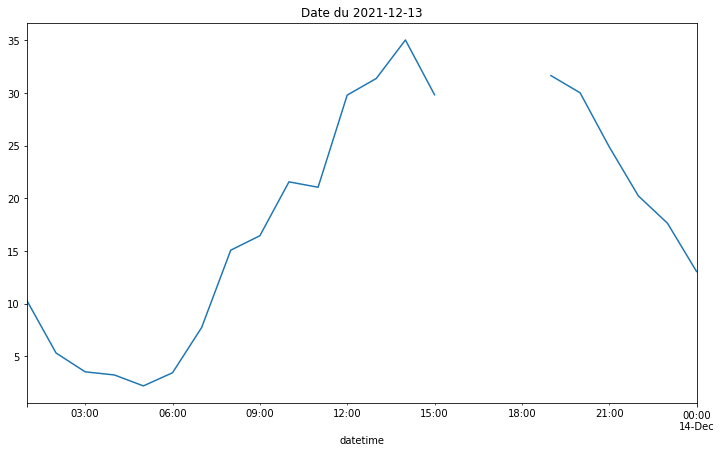

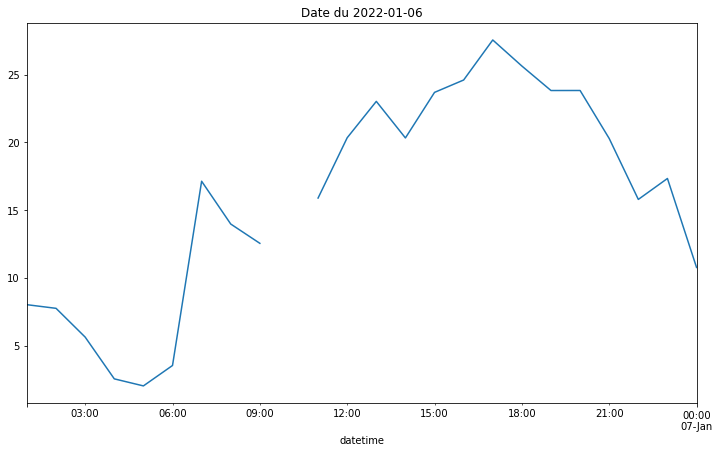

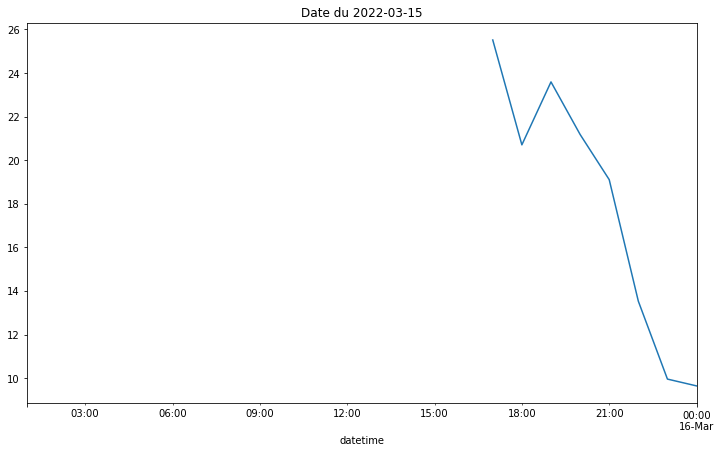

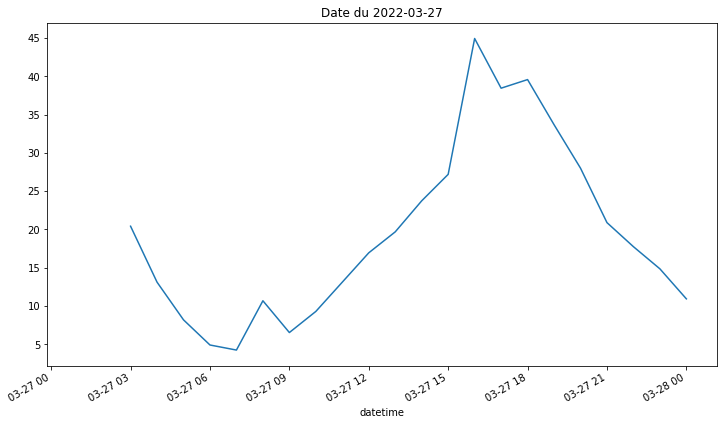

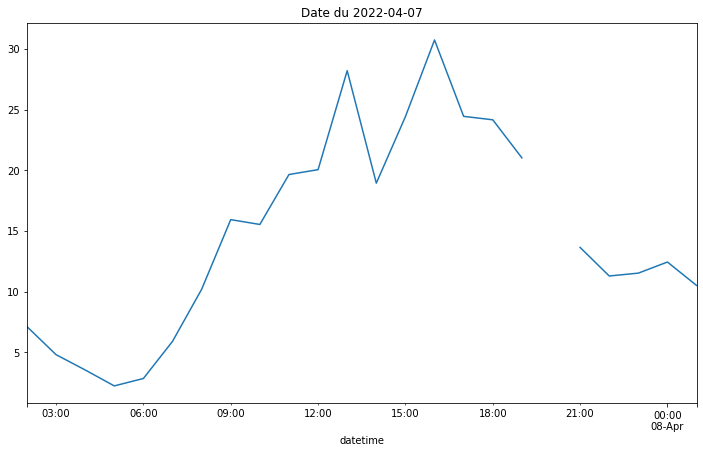

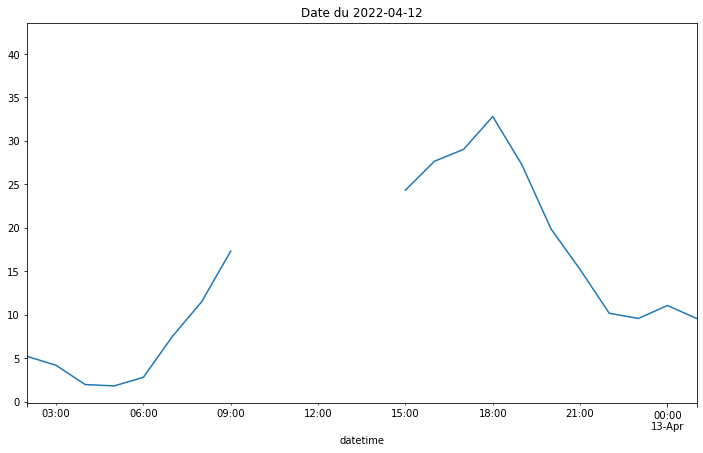

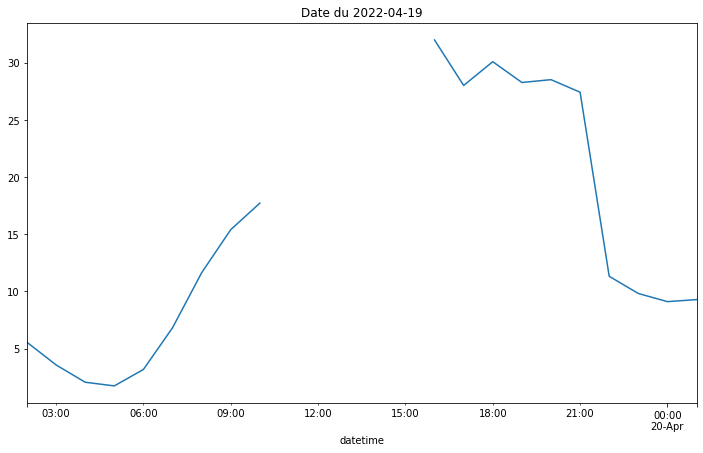

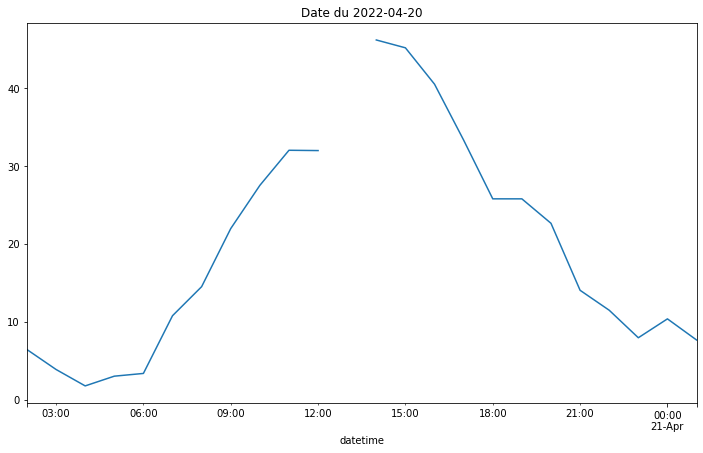

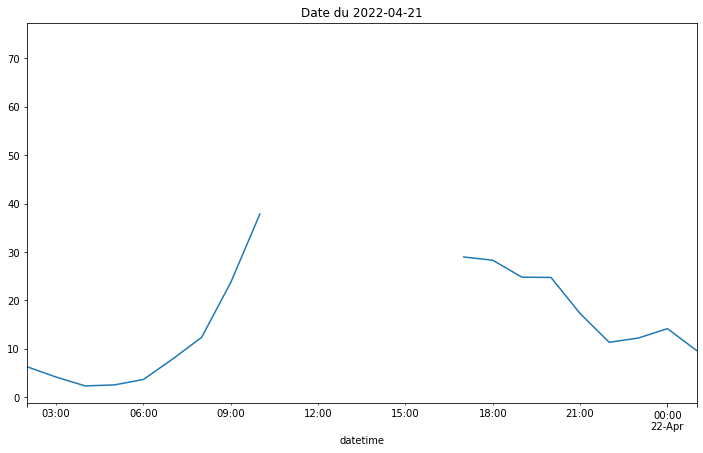

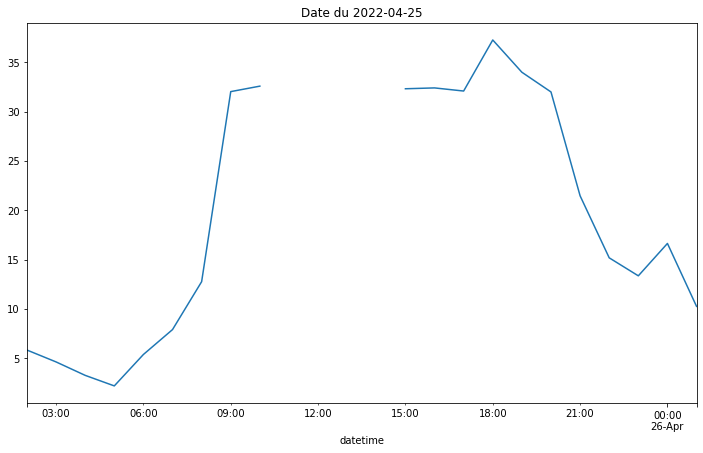

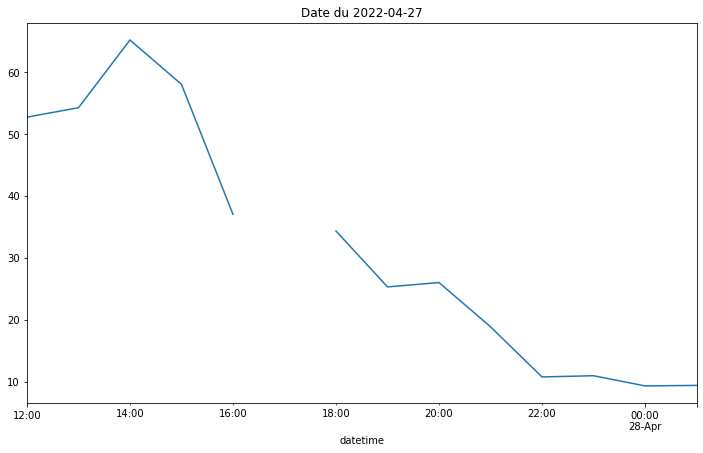

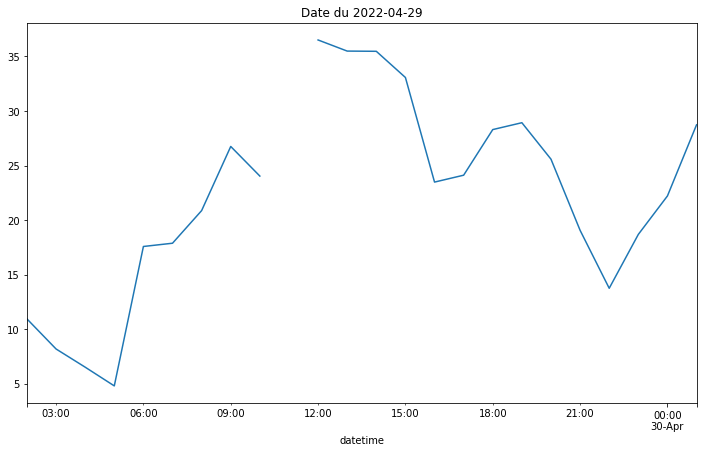

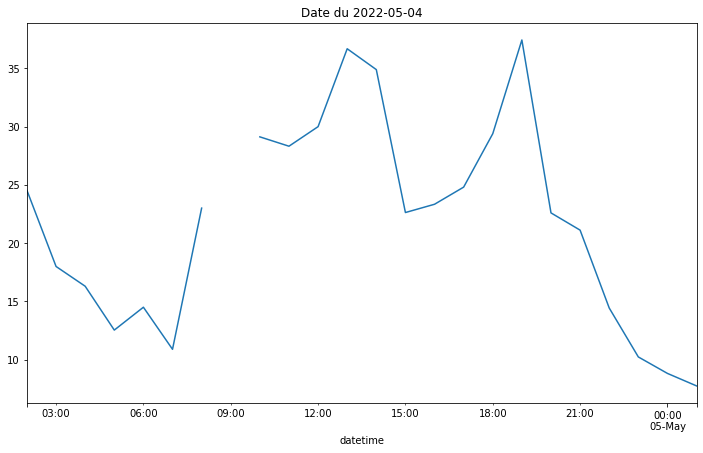

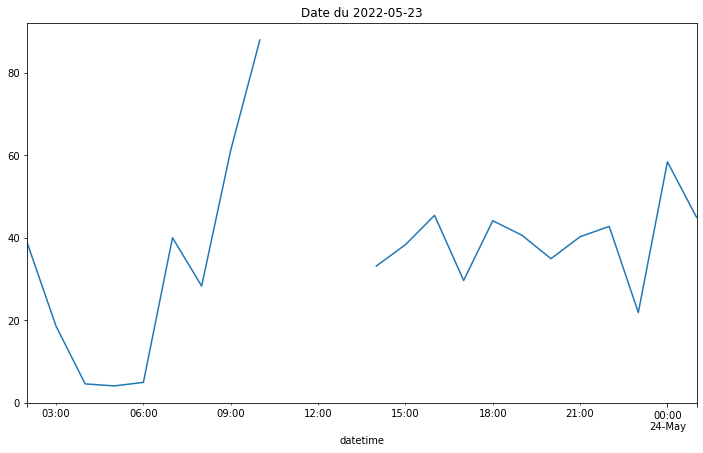

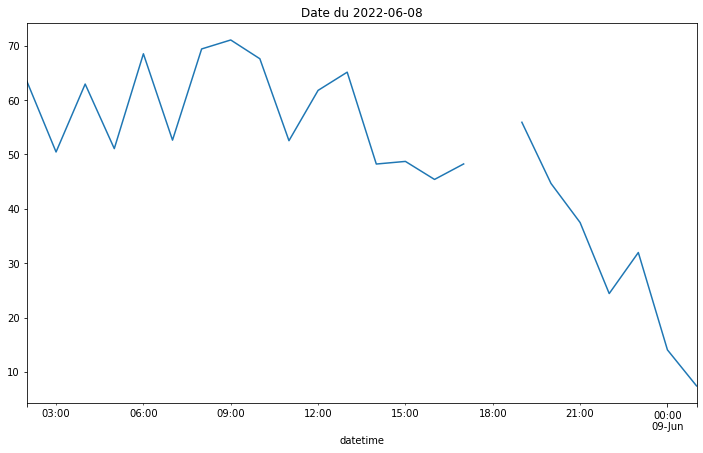

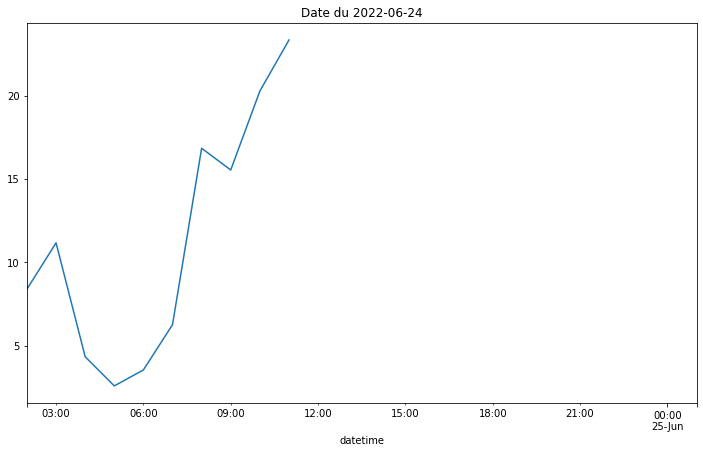

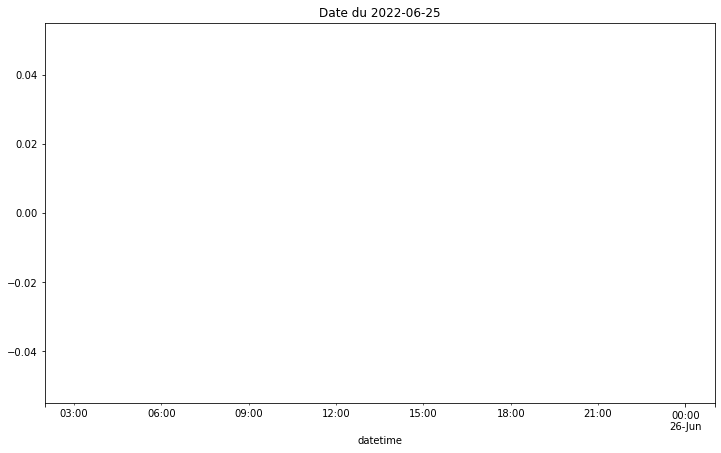

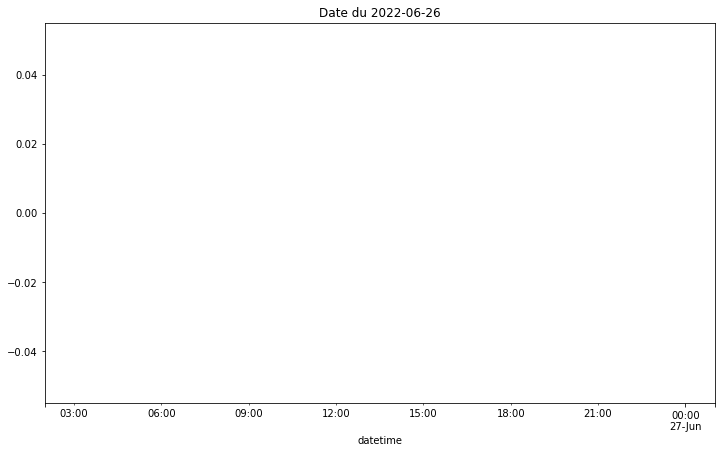

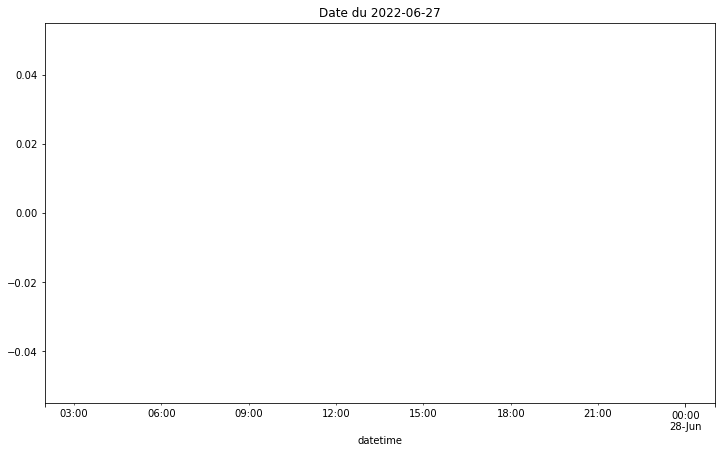

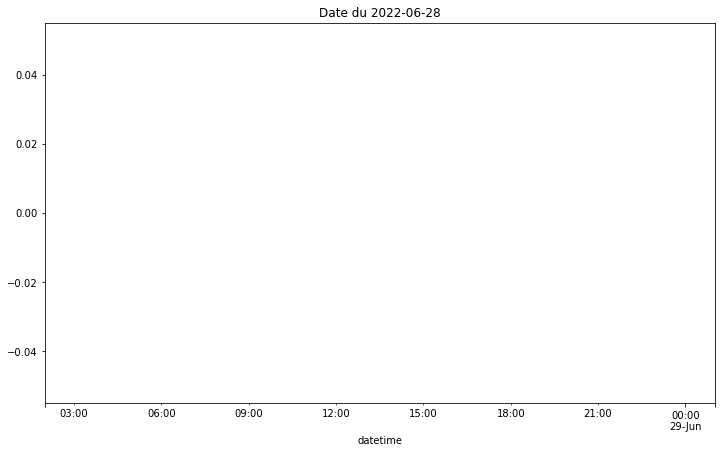

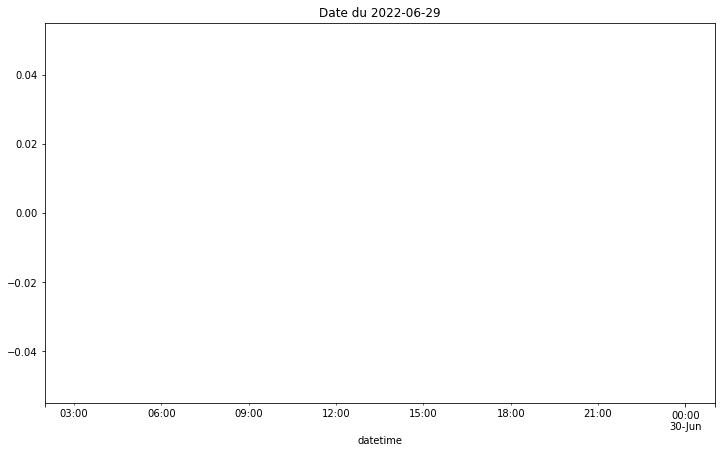

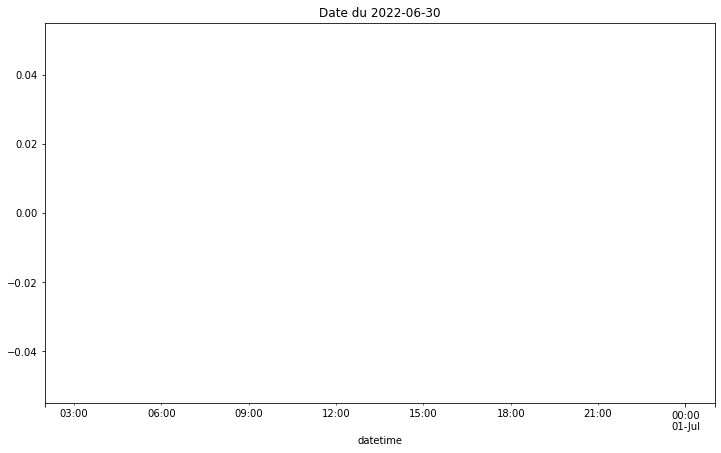

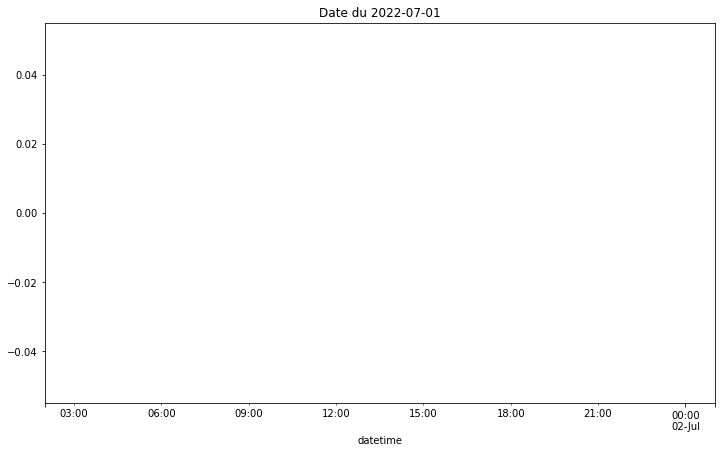

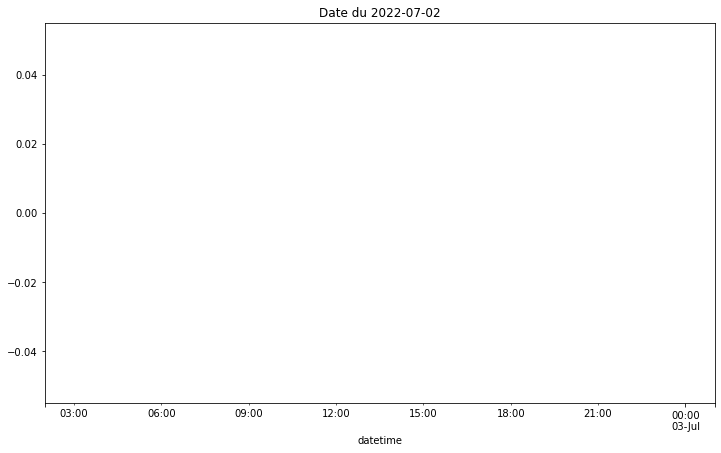

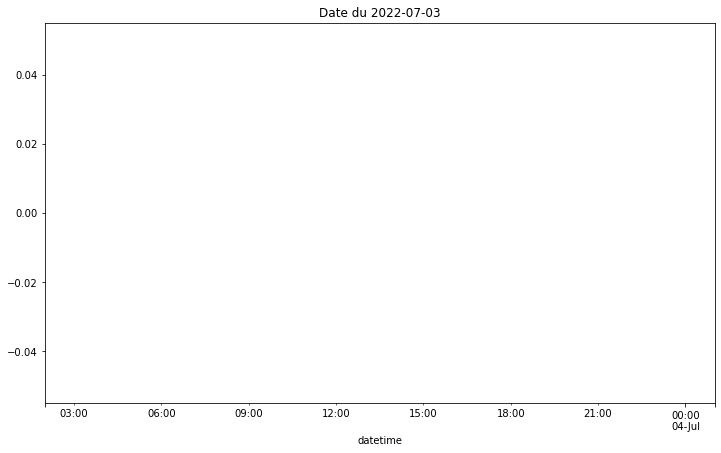

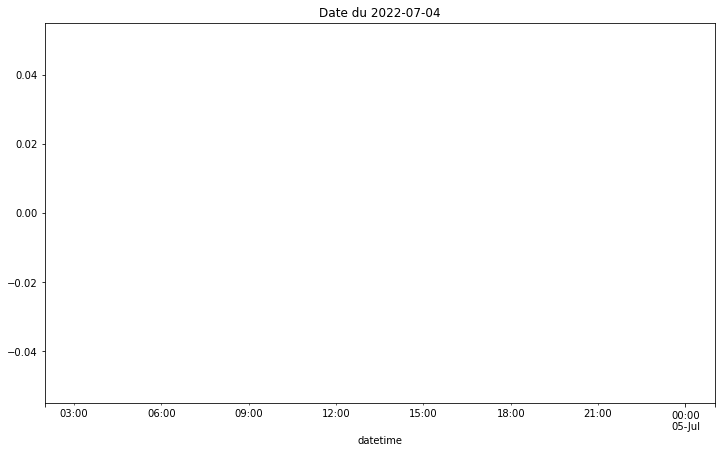

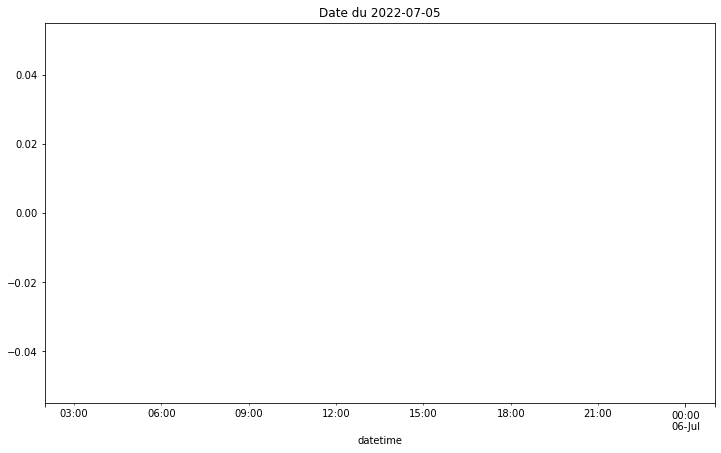

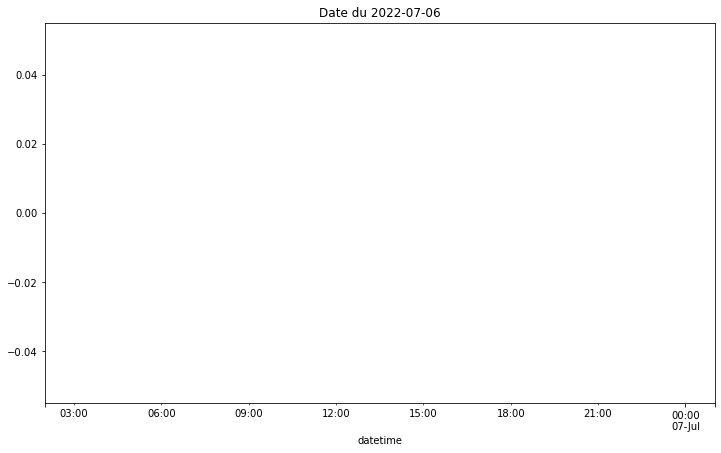

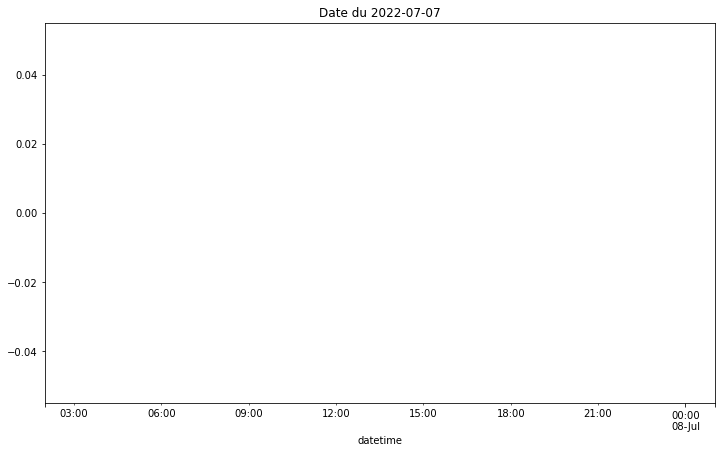

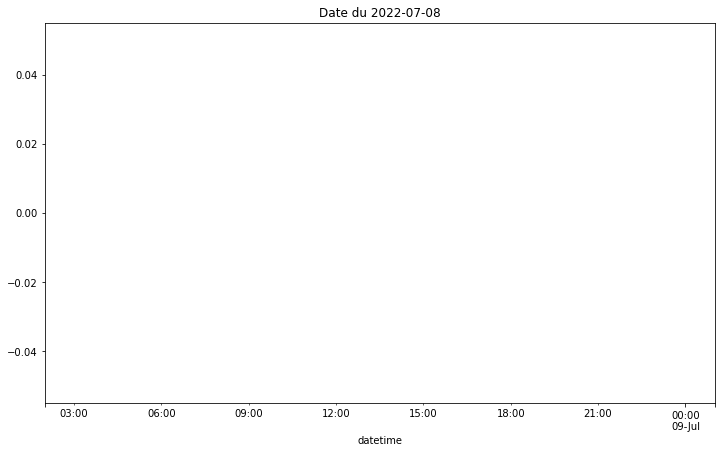

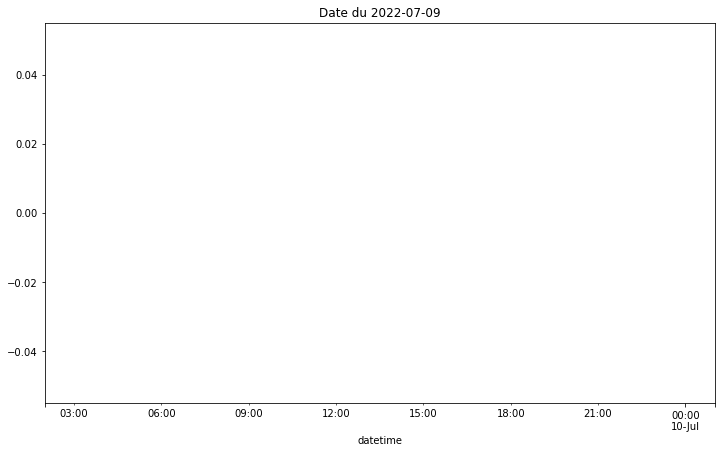

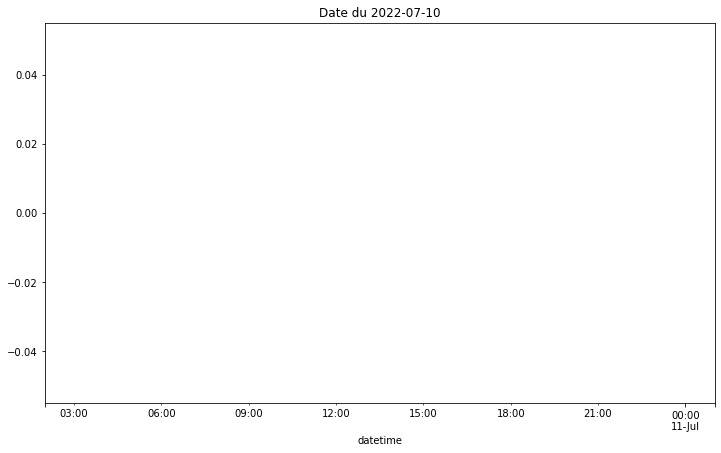

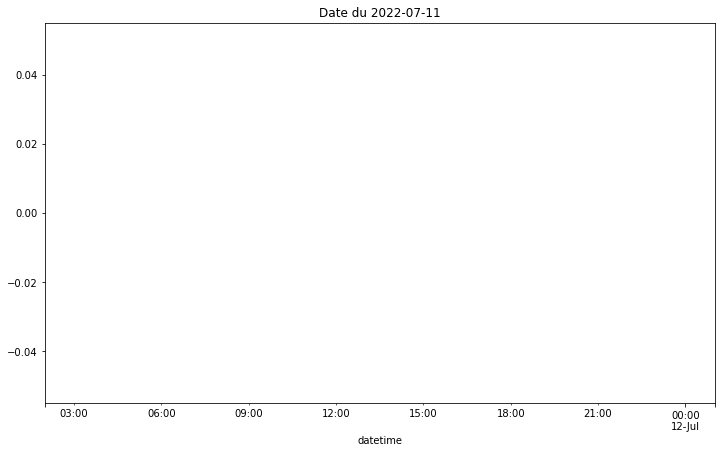

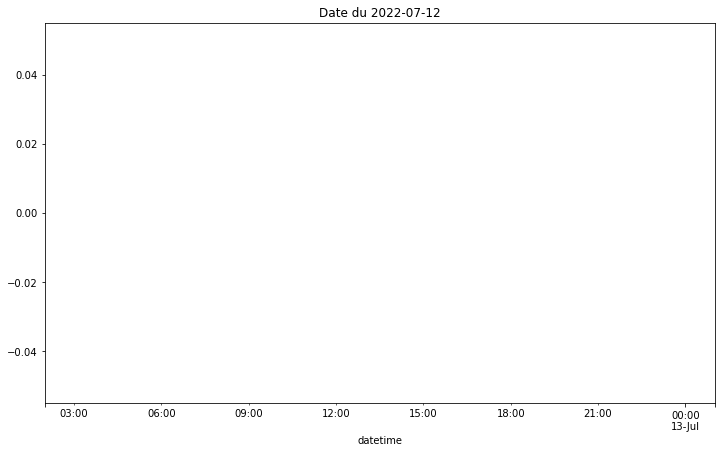

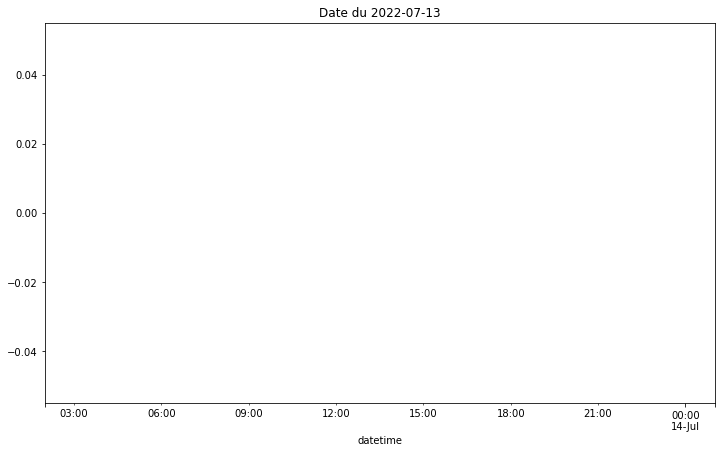

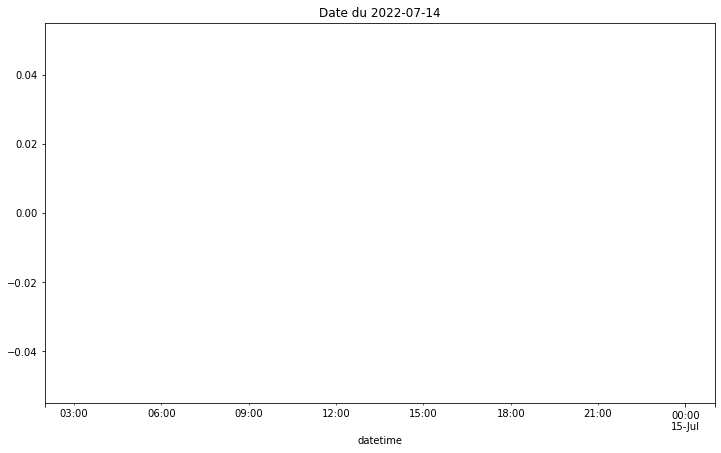

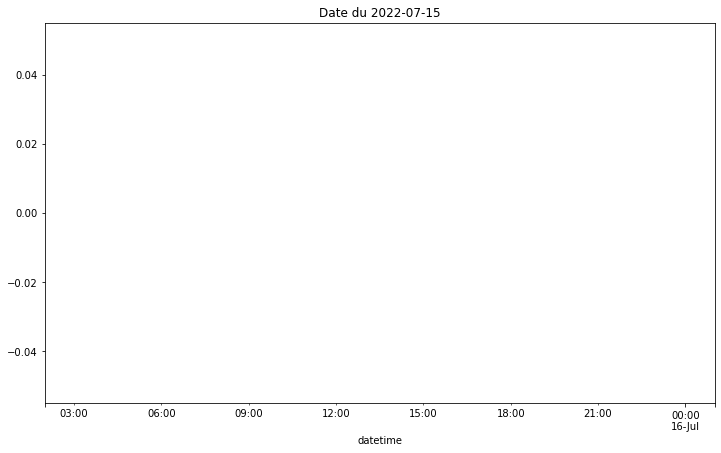

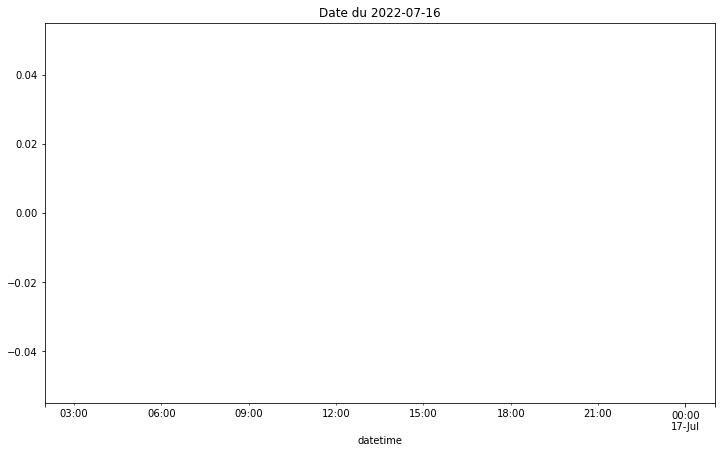

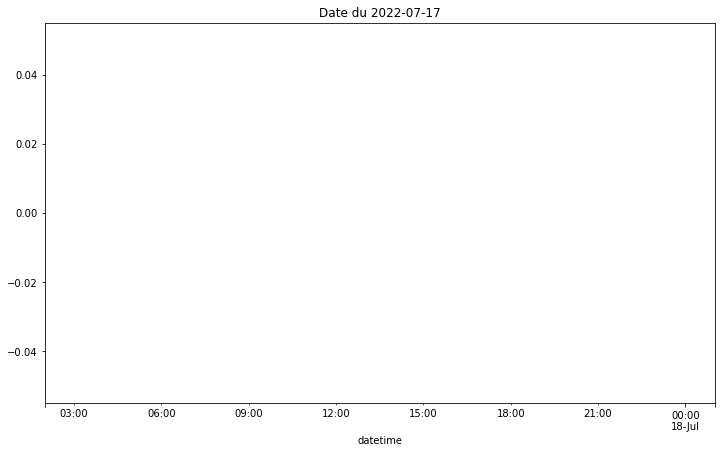

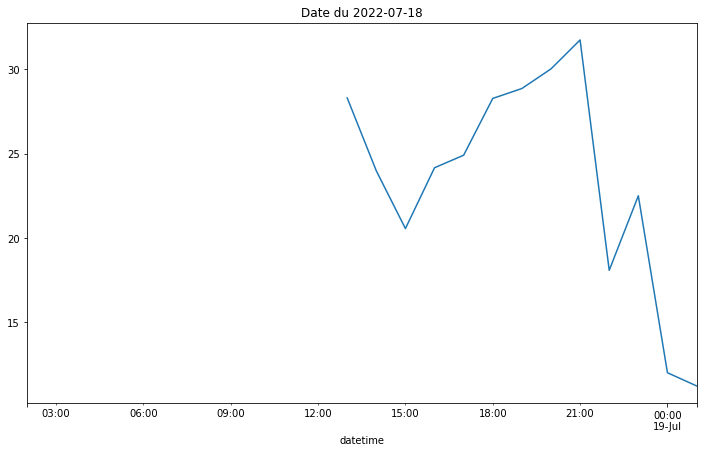

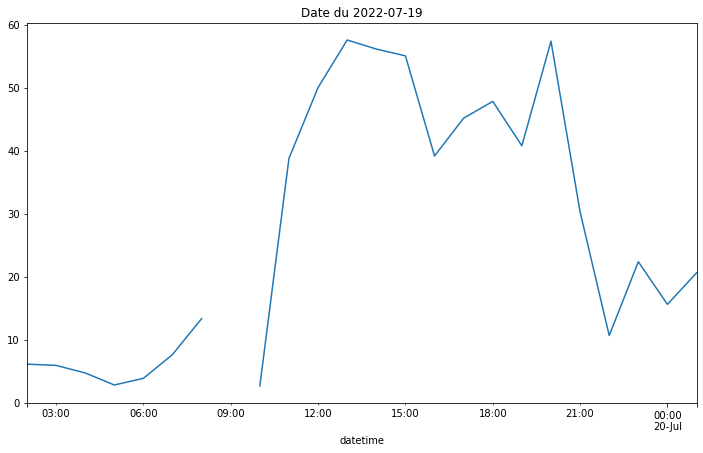

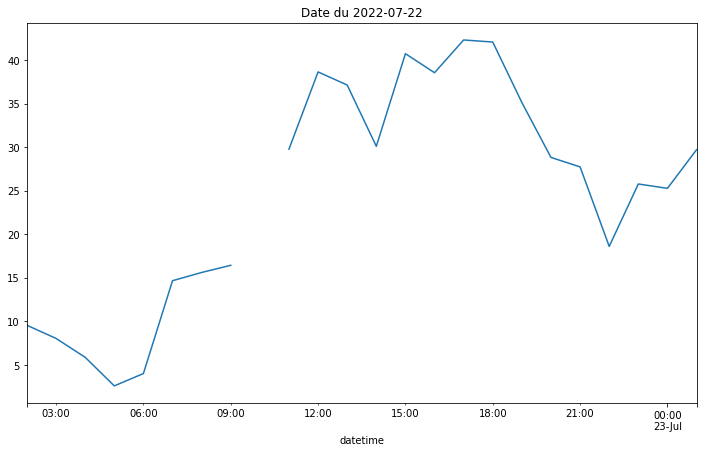

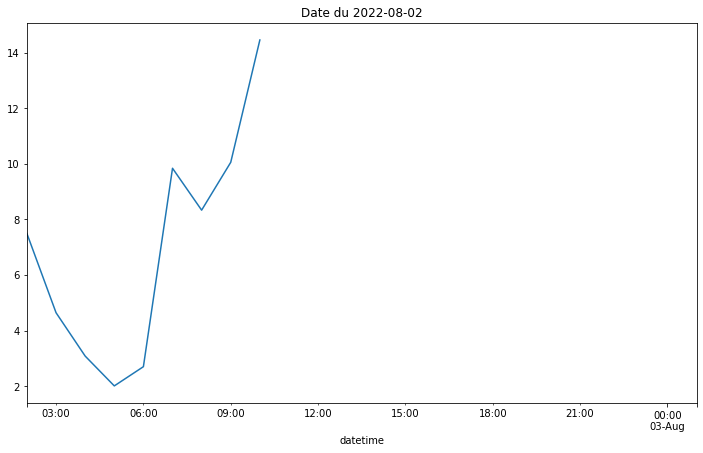

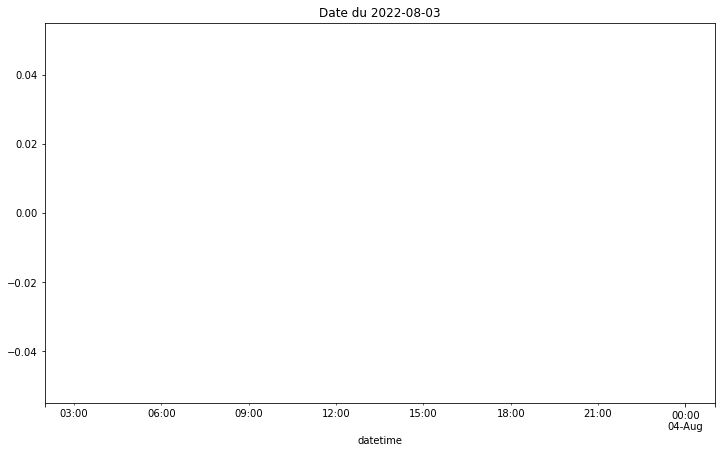

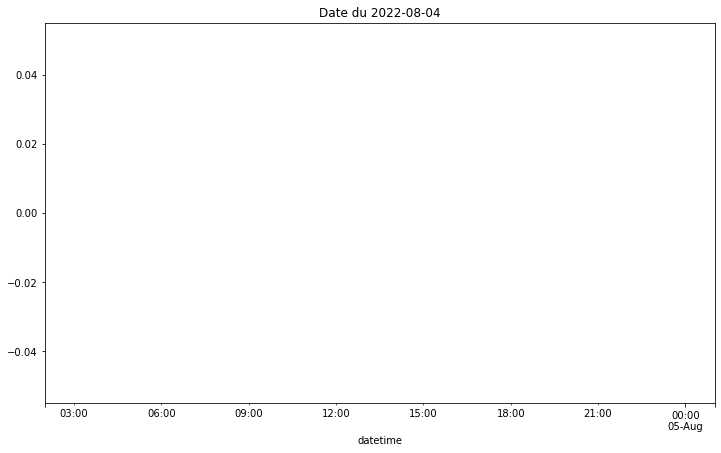

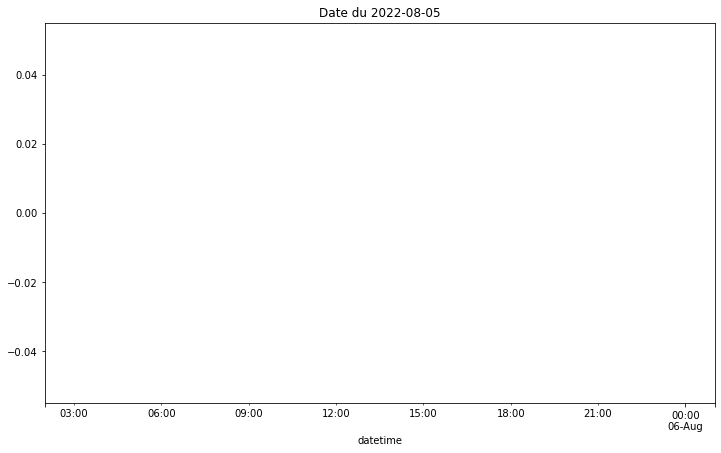

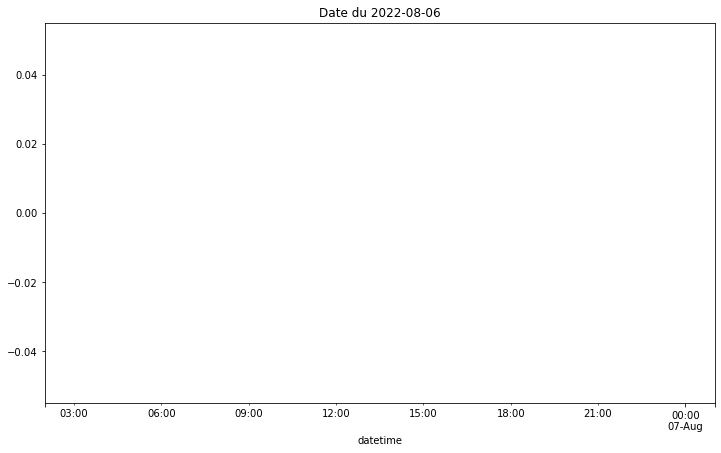

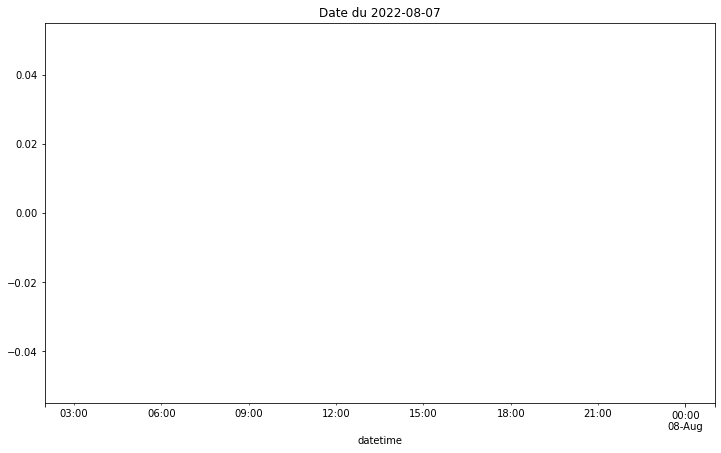

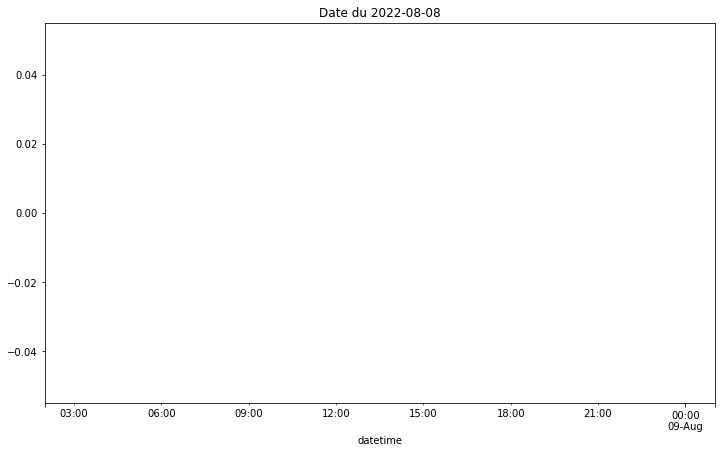

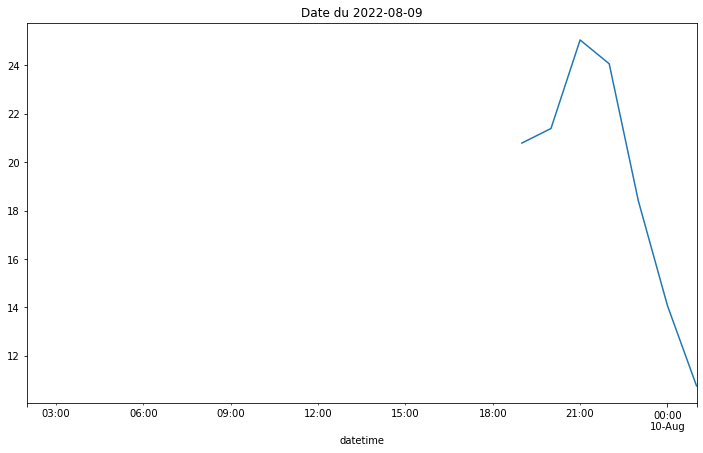

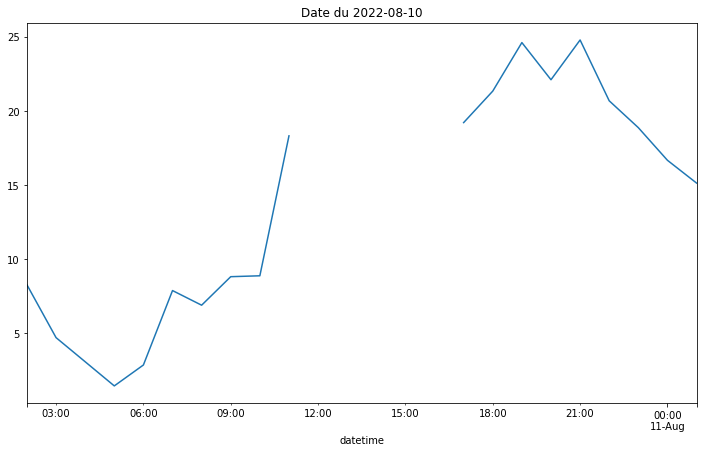

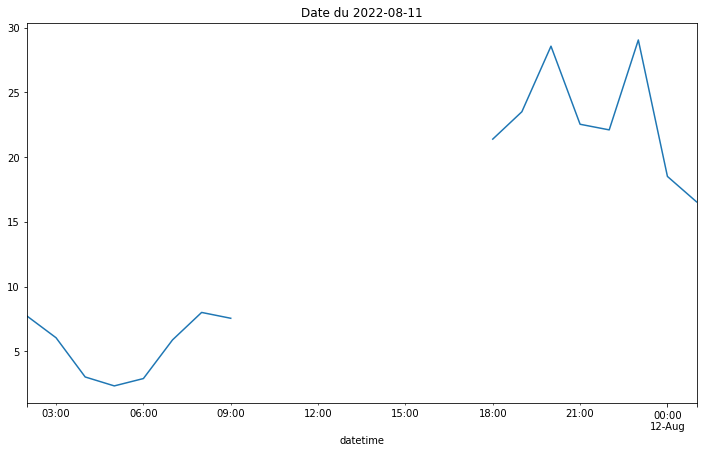

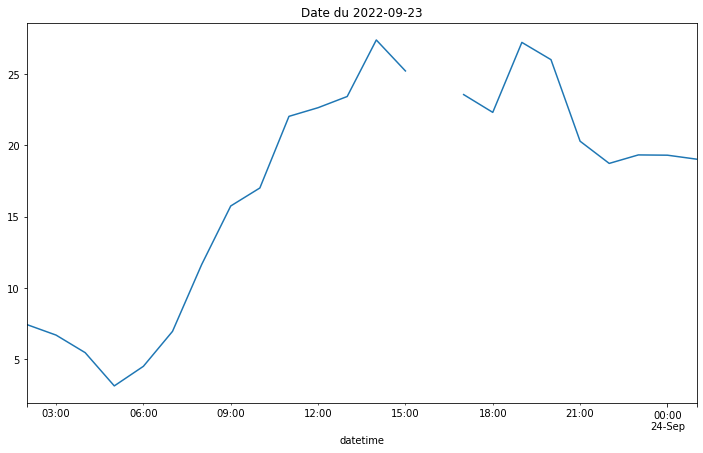

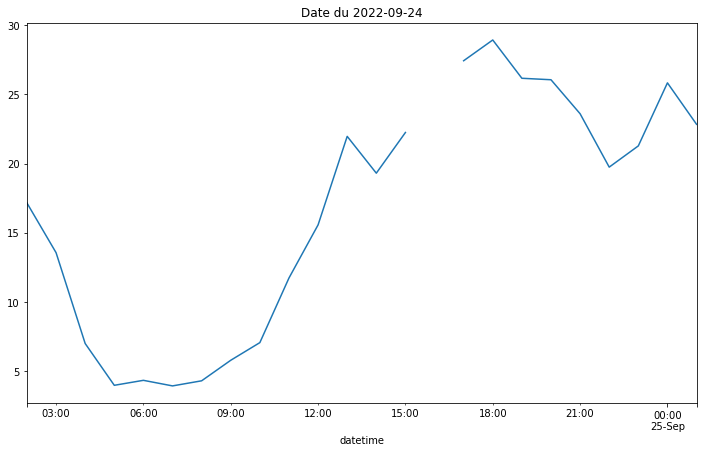

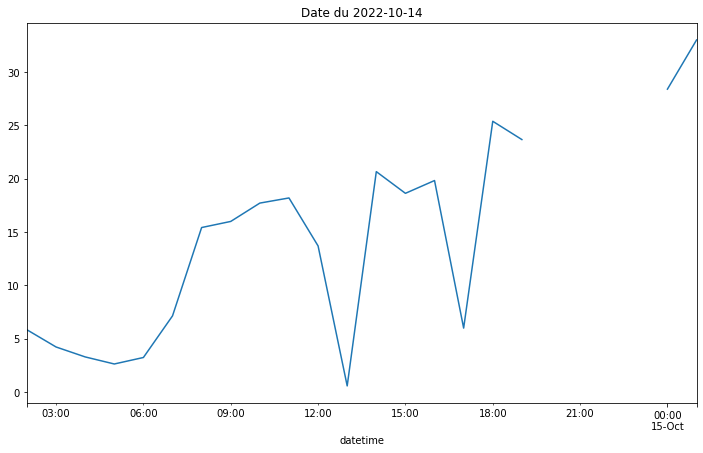

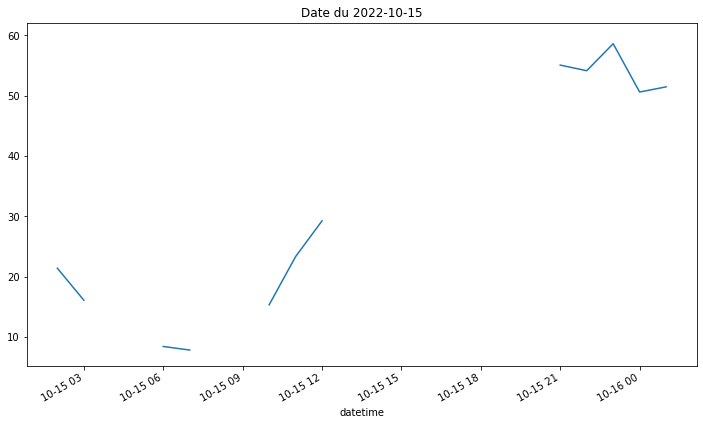

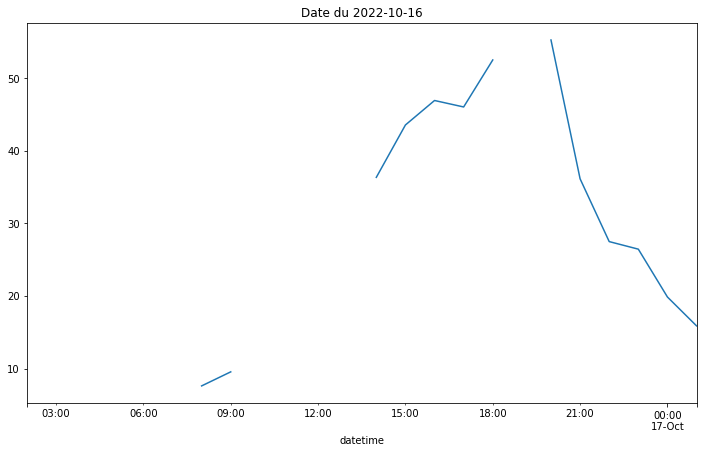

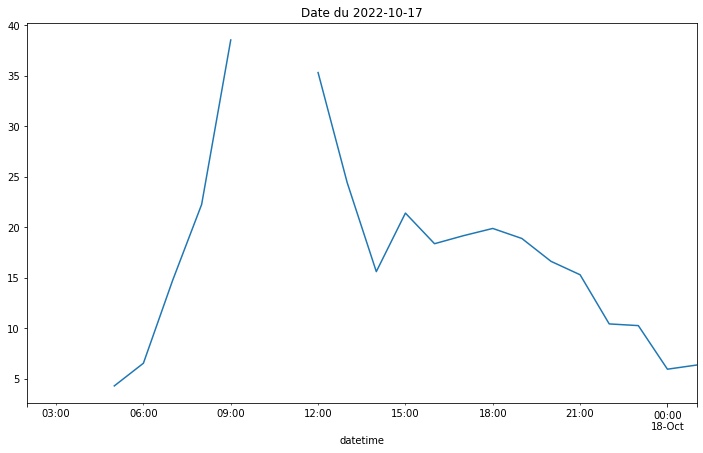

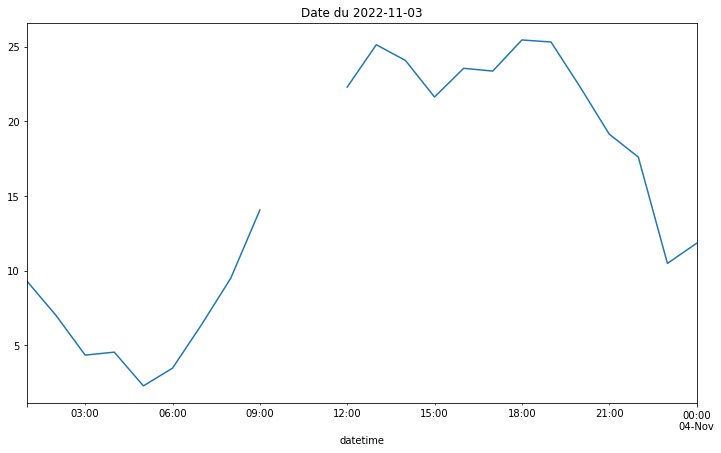

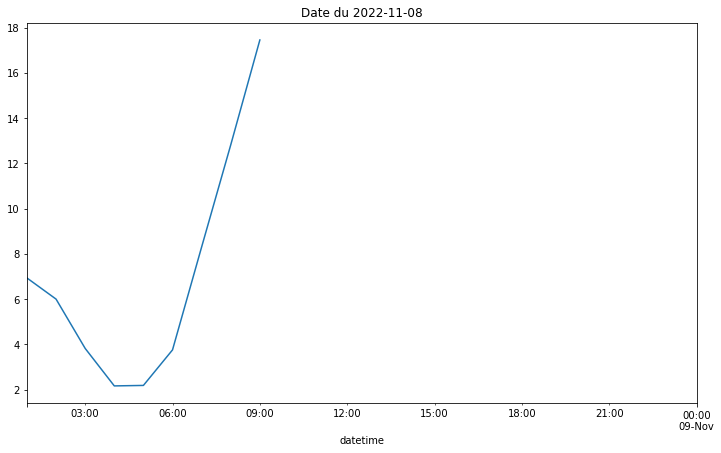

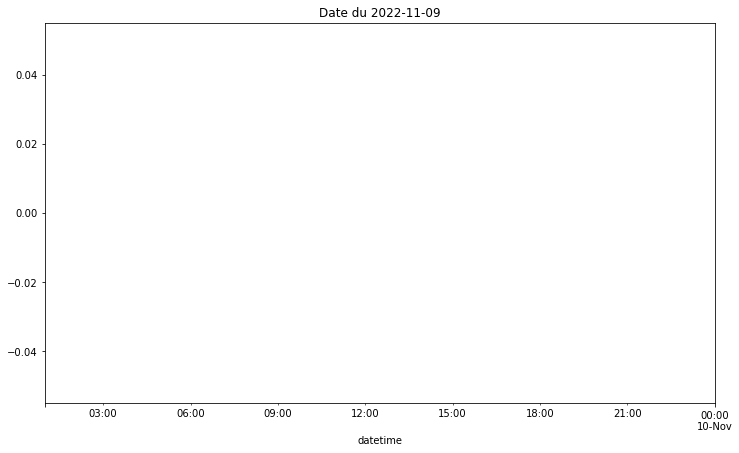

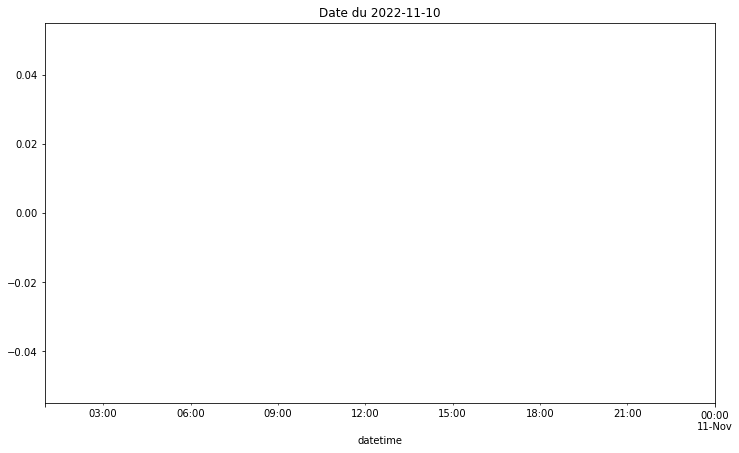

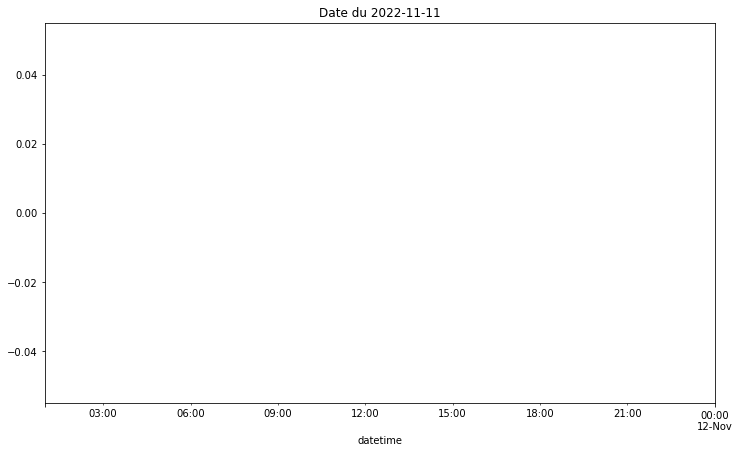

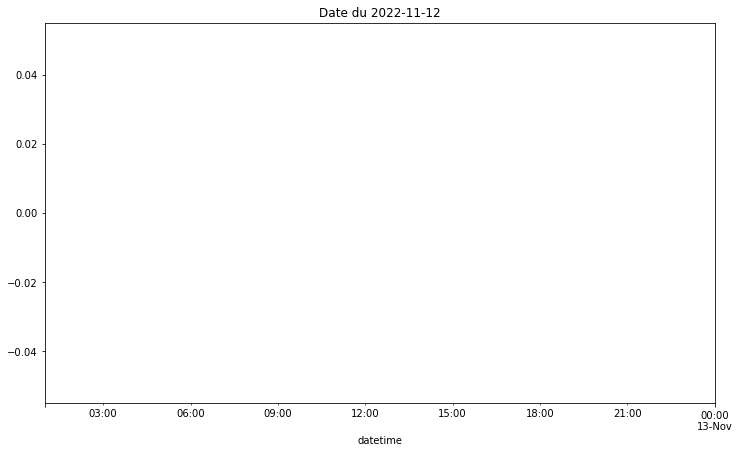

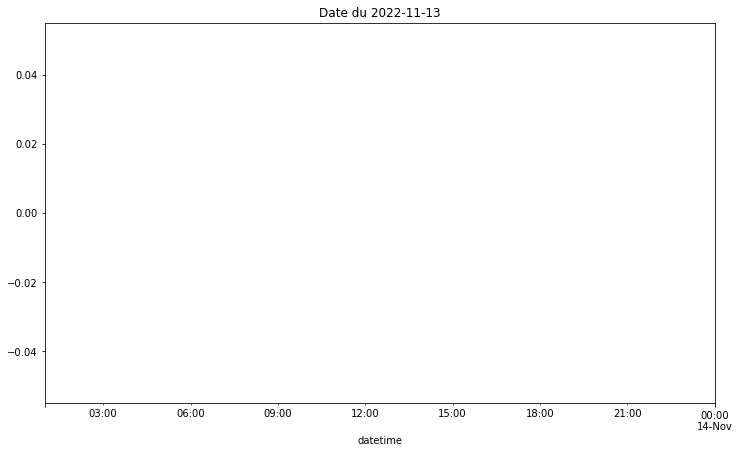

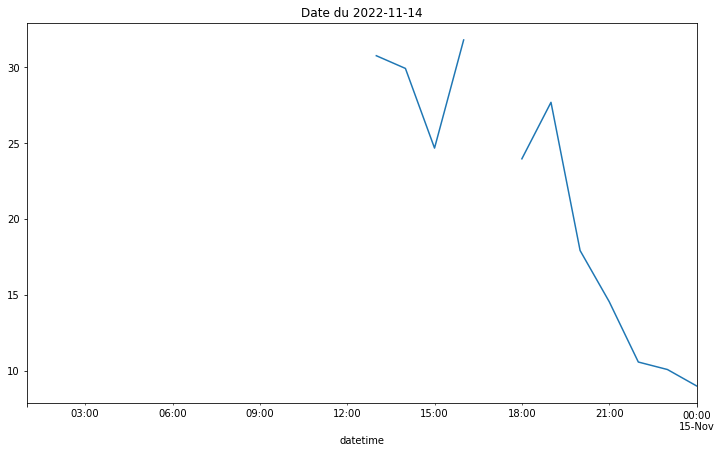

In [111]:
for date in np.array(df_[df_['Débit horaire'].isna()].date_utc.unique()):
    plt.figure(figsize=(12,7))
    df_[df_.date_utc==date]["Taux d'occupation"].plot()
    plt.title(f"Date du {date}")

For missing values, we can fill them with median/mean values of the entire dataset.

In [112]:
## use this to fill na values 
df_[["time_utc", "weekday_utc", "Débit horaire"]].groupby(["weekday_utc", "time_utc"]).median()

Débit horaire
weekday_utc time_utc               
Friday      00:00:00          687.0
            01:00:00          601.0
            02:00:00          409.0
            03:00:00          292.0
            04:00:00          335.0
...                             ...
Wednesday   19:00:00         1051.0
            20:00:00          901.0
            21:00:00          832.0
            22:00:00          771.0
            23:00:00          713.0

[168 rows x 1 columns]

### Baseline model : Moving Average/median 

In [113]:
## Median value on last 5 weeks 
nb_weeks = 5
max_date = df_.date_utc.max()
min_date = max_date - timedelta(days = nb_weeks*7)
#print("max ", max_date)
#print("min ", min_date)
df_filtered = df_[(df_.date_utc>min_date)&(df_.date_utc<=max_date)]
#print(df_filtered.weekday_utc.value_counts())
feature_debit = df_filtered[["time_utc", "weekday_utc", "Débit horaire"]].groupby(["weekday_utc", "time_utc"]).median()
feature_taux = df_filtered[["time_utc", "weekday_utc", "Taux d'occupation"]].groupby(["weekday_utc", "time_utc"]).median()
## Merge the two features 
features = pd.merge(feature_debit, feature_taux,  how='left', on=['weekday_utc','time_utc'])
features

Débit horaire  Taux d'occupation
weekday_utc time_utc                                  
Friday      00:00:00          706.0           9.876945
            01:00:00          643.0           9.544445
            02:00:00          474.5           5.931670
            03:00:00          355.5           4.697780
            04:00:00          310.0           3.943610
...                             ...                ...
Wednesday   19:00:00         1201.0          21.740555
            20:00:00         1119.0          19.177500
            21:00:00          876.0          16.131110
            22:00:00          762.5          14.168335
            23:00:00          706.0          11.158615

[168 rows x 2 columns]

In [114]:
#create future dates 
min_date = df_.date_utc.max()+timedelta(days=1)
max_date = min_date + timedelta(days = 4)
pred = pd.DataFrame(pd.date_range(start=min_date, end=max_date, freq='1H'))
pred.rename(columns = {0:'timestamp'}, inplace = True)
pred["date_utc"] = pd.to_datetime(pred["timestamp"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.date
pred["time_utc"] = pd.to_datetime(pred["timestamp"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.time
pred["weekday_utc"] = pd.to_datetime(pred["timestamp"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.day_name()

In [115]:
pred

,timestamp,date_utc,time_utc,weekday_utc
0,2022-12-05 00:00:00,2022-12-05,00:00:00,Monday
1,2022-12-05 01:00:00,2022-12-05,01:00:00,Monday
2,2022-12-05 02:00:00,2022-12-05,02:00:00,Monday
3,2022-12-05 03:00:00,2022-12-05,03:00:00,Monday
4,2022-12-05 04:00:00,2022-12-05,04:00:00,Monday
...,...,...,...,...
92,2022-12-08 20:00:00,2022-12-08,20:00:00,Thursday
93,2022-12-08 21:00:00,2022-12-08,21:00:00,Thursday
94,2022-12-08 22:00:00,2022-12-08,22:00:00,Thursday
95,2022-12-08 23:00:00,2022-12-08,23:00:00,Thursday


- /!\ drop last line before submitting 

In [116]:
pred = pd.merge(pred, features,  how='left', on=['weekday_utc','time_utc'])
pred

,timestamp,date_utc,time_utc,weekday_utc,Débit horaire,Taux d'occupation
0,2022-12-05 00:00:00,2022-12-05,00:00:00,Monday,560.5,7.189445
1,2022-12-05 01:00:00,2022-12-05,01:00:00,Monday,400.5,5.075280
2,2022-12-05 02:00:00,2022-12-05,02:00:00,Monday,262.5,3.164725
3,2022-12-05 03:00:00,2022-12-05,03:00:00,Monday,173.5,2.474725
4,2022-12-05 04:00:00,2022-12-05,04:00:00,Monday,168.0,1.855560
...,...,...,...,...,...,...
92,2022-12-08 20:00:00,2022-12-08,20:00:00,Thursday,1069.5,21.591945
93,2022-12-08 21:00:00,2022-12-08,21:00:00,Thursday,937.0,17.738055
94,2022-12-08 22:00:00,2022-12-08,22:00:00,Thursday,793.5,13.413890
95,2022-12-08 23:00:00,2022-12-08,23:00:00,Thursday,765.5,12.593335
